In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from src.components.model_prediction import evaluation_metrics, predict_and_plot
import yfinance as yf
import numpy as np
from src.components.data_preprocessor import MinMaxScaling, PreProcessor
from src.components.data_splitter import CustomDataSplittingStrategy, DataSplitter, create_sequences
from src.components.model_building import GRUModelBuilder, LSTMModelBuilder, ModelBuilder, RNNMdelBuilder


In [ ]:
data = pd.read_csv('D:\coding\ml\stock-price-predictor\src\components\data\AAPL_stock_data.csv')
data


,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-11-07 00:00:00+00:00,62.947399,64.857498,65.087502,64.527496,64.684998,94940400
1,2019-11-08 00:00:00+00:00,63.119667,65.035004,65.110001,64.212502,64.672501,69986400
2,2019-11-11 00:00:00+00:00,63.619492,65.550003,65.617500,64.570000,64.574997,81821200
3,2019-11-12 00:00:00+00:00,63.561279,65.489998,65.697502,65.230003,65.387497,87388800
4,2019-11-13 00:00:00+00:00,64.170296,66.117500,66.195000,65.267502,65.282501,102734400
...,...,...,...,...,...,...,...
1251,2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200
1252,2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900
1253,2024-10-31 00:00:00+00:00,225.910004,225.910004,229.830002,225.369995,229.339996,64370100
1254,2024-11-01 00:00:00+00:00,222.910004,222.910004,225.350006,220.270004,220.970001,65276700


In [36]:
data[['Date','date']] =  data['Date'].str.split(" ",expand=True)

0        94940400
1        69986400
2        81821200
3        87388800
4       102734400
          ...    
1251     35417200
1252     47070900
1253     64370100
1254     65276700
1255     44903300
Name: Volume, Length: 1256, dtype: int64

In [41]:
217.52999878,221.27000427,221.72000122,224.72000122,226.05000305,225.88999939,226.50999451,226.3999939,224.52999878,226.83999634,227.17999268,228.02999878,226.49000549,229.78999329,229,222.77000427,220.8500061,222.38000488,220.82000732,220.91000366,220.11000061,222.66000366,222.77000427,222.5,216.32000732,216.78999329,220.69000244,228.86999512,228.19999695,226.47000122,227.36999512,226.36999512,227.52000427,227.78999329,233,226.21000671,226.77999878,225.66999817,226.80000305,221.69000244,225.77000427,229.53999329,229.03999329,227.55000305,231.30000305,233.8500061,231.77999878,232.1499939,235,236.47999573,235.86000061,230.75999451,230.57000732,231.41000366,233.3999939,233.66999817,230.1000061,225.91000366,222.91000366,222.00999451

(217.52999878,
 221.27000427,
 221.72000122,
 224.72000122,
 226.05000305,
 225.88999939,
 226.50999451,
 226.3999939,
 224.52999878,
 226.83999634,
 227.17999268,
 228.02999878,
 226.49000549,
 229.78999329,
 229,
 222.77000427,
 220.8500061,
 222.38000488,
 220.82000732,
 220.91000366,
 220.11000061,
 222.66000366,
 222.77000427,
 222.5,
 216.32000732,
 216.78999329,
 220.69000244,
 228.86999512,
 228.19999695,
 226.47000122,
 227.36999512,
 226.36999512,
 227.52000427,
 227.78999329,
 233,
 226.21000671,
 226.77999878,
 225.66999817,
 226.80000305,
 221.69000244,
 225.77000427,
 229.53999329,
 229.03999329,
 227.55000305,
 231.30000305,
 233.8500061,
 231.77999878,
 232.1499939,
 235,
 236.47999573,
 235.86000061,
 230.75999451,
 230.57000732,
 231.41000366,
 233.3999939,
 233.66999817,
 230.1000061,
 225.91000366,
 222.91000366,
 222.00999451)

                        Date  Adj Close      Close       High        Low  \
0  2019-11-07 00:00:00+00:00  62.947399  64.857498  65.087502  64.527496   
1  2019-11-08 00:00:00+00:00  63.119667  65.035004  65.110001  64.212502   
2  2019-11-11 00:00:00+00:00  63.619492  65.550003  65.617500  64.570000   
3  2019-11-12 00:00:00+00:00  63.561279  65.489998  65.697502  65.230003   
4  2019-11-13 00:00:00+00:00  64.170296  66.117500  66.195000  65.267502   

        Open     Volume  
0  64.684998   94940400  
1  64.672501   69986400  
2  64.574997   81821200  
3  65.387497   87388800  
4  65.282501  102734400  
(1256, 1)

begining model training for lstm
-----------------------------------------------


c:\Users\aumpa\anaconda3\envs\stockenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

None
model history completed for lstm
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
Mean Squared Error: 9.831403862071367
Mean Absolute Error: 2.2922592163085938
R^2 Score: 0.9819918642310438
lstm => 9.831403862071367
lstm => 2.2922592163085938
lstm => 0.9819918642310438
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


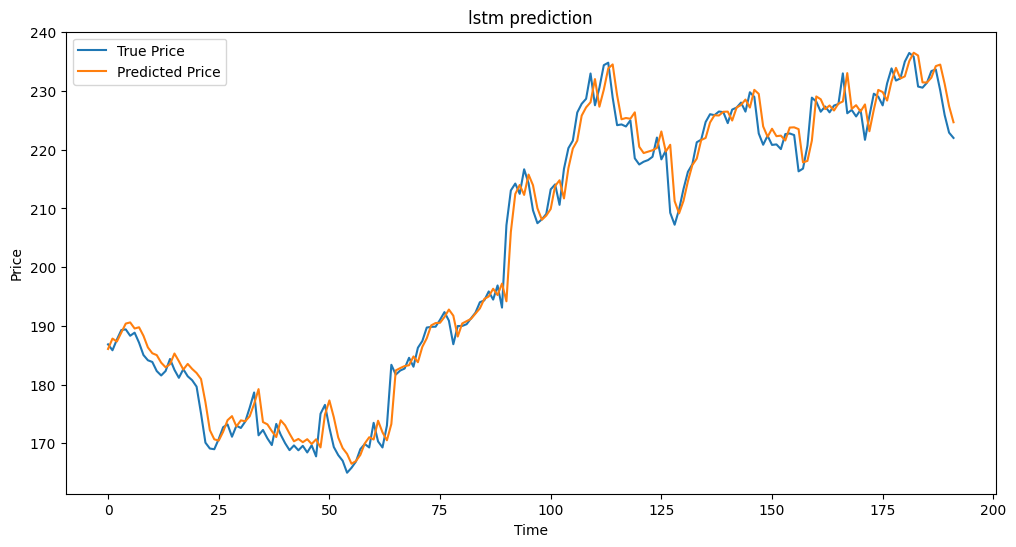

the final model is <Sequential name=sequential_2, built=True>


In [49]:
def training_pipeline(data):
    print(data.head())

    #preprocessing the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close']])
    print(scaled_data.shape)

    # Splitting the data
    splitter = DataSplitter(strategy=CustomDataSplittingStrategy())
    X_train,y_train,X_test,y_test = splitter.split(scaled_data)

    #making a dictionary to store models
    predict_models = {}

    #building models
    model_builder = ModelBuilder(LSTMModelBuilder())
    model = model_builder.compile_model(X_train=X_train)


    print()
    print(f"begining model training for lstm")
    print("-----------------------------------------------")
    print(model.summary())
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0,validation_data=(X_test,y_test))
    print(f"model history completed for lstm")
    mse,mae,r2 = evaluation_metrics(X_test,y_test,scaler,model)
    print(f"lstm => {mse}")
    print(f"lstm => {mae}")
    print(f"lstm => {r2}")
    print("========================================================================")
    predict_and_plot(model,X_test,y_test,scaler,title=f"lstm prediction")


    return model

data = pd.read_csv("D:/coding/ml/stock-price-predictor/src/components/data/AAPL_stock_data.csv")
model = training_pipeline(data=data)
print(f"the final model is {model}")

In [50]:
print(data.head())

#preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])
print(scaled_data.shape)

                        Date  Adj Close      Close       High        Low  \
0  2019-11-07 00:00:00+00:00  62.947399  64.857498  65.087502  64.527496   
1  2019-11-08 00:00:00+00:00  63.119667  65.035004  65.110001  64.212502   
2  2019-11-11 00:00:00+00:00  63.619492  65.550003  65.617500  64.570000   
3  2019-11-12 00:00:00+00:00  63.561279  65.489998  65.697502  65.230003   
4  2019-11-13 00:00:00+00:00  64.170296  66.117500  66.195000  65.267502   

        Open     Volume  
0  64.684998   94940400  
1  64.672501   69986400  
2  64.574997   81821200  
3  65.387497   87388800  
4  65.282501  102734400  
(1256, 1)


In [67]:
time_step = 60
last_sequence = scaled_data[-time_step:]
last_sequence = scaler.inverse_transform(last_sequence)

last_sequence.tolist()

[[217.52999877929688],
 [221.2700042724609],
 [221.72000122070312],
 [224.72000122070312],
 [226.0500030517578],
 [225.88999938964844],
 [226.50999450683597],
 [226.3999938964844],
 [224.52999877929688],
 [226.83999633789065],
 [227.17999267578125],
 [228.02999877929688],
 [226.4900054931641],
 [229.7899932861328],
 [228.99999999999997],
 [222.77000427246094],
 [220.85000610351562],
 [222.38000488281247],
 [220.82000732421878],
 [220.91000366210935],
 [220.11000061035156],
 [222.66000366210935],
 [222.77000427246094],
 [222.5],
 [216.32000732421875],
 [216.7899932861328],
 [220.69000244140625],
 [228.8699951171875],
 [228.1999969482422],
 [226.47000122070312],
 [227.36999511718747],
 [226.36999511718747],
 [227.5200042724609],
 [227.7899932861328],
 [232.99999999999997],
 [226.2100067138672],
 [226.77999877929688],
 [225.66999816894534],
 [226.8000030517578],
 [221.69000244140625],
 [225.77000427246094],
 [229.5399932861328],
 [229.0399932861328],
 [227.5500030517578],
 [231.3000030517

In [ ]:
217.52999877929688,
221.2700042724609,
221.72000122070312,
224.72000122070312,
226.0500030517578,
225.88999938964844,
226.50999450683597,
226.3999938964844,
224.52999877929688,
226.83999633789065,
227.17999267578125,
228.02999877929688,
226.4900054931641,
229.7899932861328,
228.99999999999997,
222.77000427246094,
220.85000610351562,
222.38000488281247,
220.82000732421878,
220.91000366210935,
220.11000061035156,
222.66000366210935,
222.77000427246094,
222.5,
216.32000732421875,
216.7899932861328,
220.69000244140625,
228.8699951171875,
228.1999969482422,
226.47000122070312,
227.36999511718747,
226.36999511718747,
227.5200042724609,
227.7899932861328,
232.99999999999997,
226.2100067138672,
226.77999877929688,
225.66999816894534,
226.8000030517578,
221.69000244140625,
225.77000427246094,
229.5399932861328,
229.0399932861328,
227.5500030517578,
231.30000305175784,
233.8500061035156,
231.77999877929688,
232.1499938964844,
235.00000000000003,
236.47999572753906,
235.8600006103516,
230.75999450683597,
230.57000732421875,
231.41000366210932,
233.3999938964844,
233.6699981689453,
230.10000610351557,
225.91000366210935,
222.91000366210935,
222.00999450683597

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

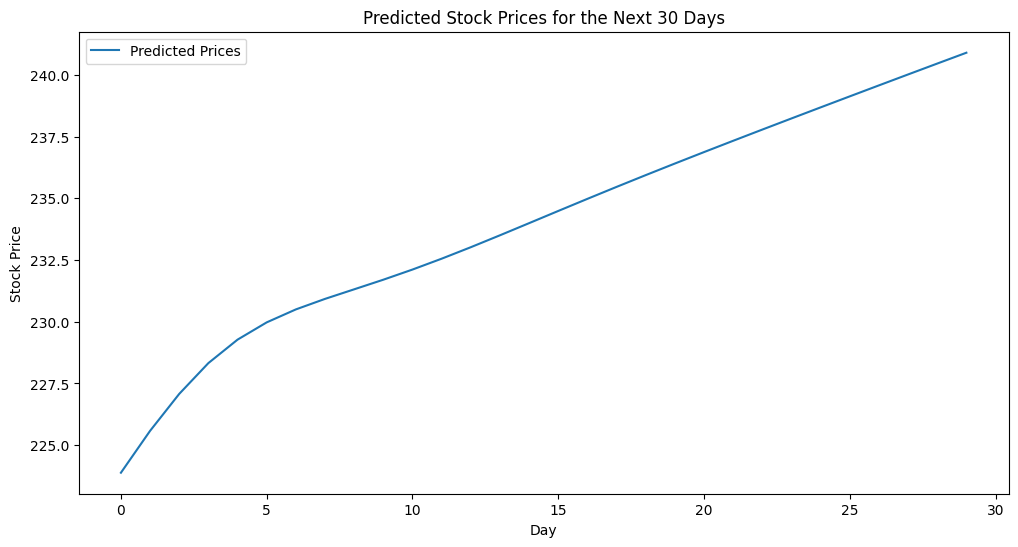

[np.float32(223.8852), np.float32(225.58138), np.float32(227.07812), np.float32(228.32521), np.float32(229.27495), np.float32(229.97432), np.float32(230.49928), np.float32(230.92543), np.float32(231.31313), np.float32(231.70229), np.float32(232.11356), np.float32(232.55319), np.float32(233.01813), np.float32(233.50073), np.float32(233.99258), np.float32(234.48634), np.float32(234.97676), np.float32(235.46097), np.float32(235.93776), np.float32(236.40732), np.float32(236.87057), np.float32(237.32863), np.float32(237.78268), np.float32(238.23352), np.float32(238.68195), np.float32(239.12825), np.float32(239.57275), np.float32(240.01544), np.float32(240.45642), np.float32(240.89563)]


In [68]:
import matplotlib.pyplot as plt
def predict_for_future(model,scaled_data,days_to_predict,time_step):
    # Get the last 60 days of data
    model.summary()
    last_sequence = scaled_data[-time_step:]
    last_sequence = last_sequence.reshape((1,time_step,1))
    days_to_predict = 30
    predicted_prices = []
    for i in range(days_to_predict):
        predicted_price_scaled = model.predict(last_sequence)
        predicted_price = scaler.inverse_transform(predicted_price_scaled)

        # Save the predicted price
        predicted_prices.append(predicted_price[0][0])

        # Update the sequence with the predicted price
        new_sequence = np.append(last_sequence[:, 1:, :], [[predicted_price_scaled[0]]], axis=1)
        last_sequence = new_sequence

    plt.figure(figsize=(12, 6))
    plt.plot(predicted_prices, label="Predicted Prices")
    plt.title("Predicted Stock Prices for the Next 30 Days")
    plt.xlabel("Day")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()
    return predicted_prices

predicted_prices = predict_for_future(model,scaled_data,days_to_predict=30,time_step=60)
print(predicted_prices)

In [54]:
arr = [np.float32(223.8852), np.float32(225.58138), np.float32(227.07812), np.float32(228.32521), np.float32(229.27495), np.float32(229.97432), np.float32(230.49928), np.float32(230.92543), np.float32(231.31313), np.float32(231.70229), np.float32(232.11356), np.float32(232.55319), np.float32(233.01813), np.float32(233.50073), np.float32(233.99258), np.float32(234.48634), np.float32(234.97676), np.float32(235.46097), np.float32(235.93776), np.float32(236.40732), np.float32(236.87057), np.float32(237.32863), np.float32(237.78268), np.float32(238.23352), np.float32(238.68195), np.float32(239.12825), np.float32(239.57275), np.float32(240.01544), np.float32(240.45642), np.float32(240.89563)]

In [57]:
lst = [223.8852,225.58138,227.07812,228.32521,229.27495,229.97432,230.49928,230.92543,231.31313,231.70229,232.11356,232.55319,233.01813,233.50073,233.99258,234.48634,234.97676,235.46097,235.93776,236.40732,236.87057,237.32863,237.78268,238.23352,238.68195,239.12825,239.57275,240.01544,240.45642,240.89563]

In [58]:
len(lst)

30